In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('MyFridge.csv')

In [ ]:
df.describe()

,power
count,4491.000000
mean,74.399795
std,64.106754
min,0.000000
25%,0.000000
50%,120.000000
75%,125.440000
max,387.600000


In [ ]:
vals = df['power'].to_numpy().reshape(-1,1)

In [ ]:
import math

In [ ]:
split_by = math.ceil(0.7*len(vals))
lag = 60

In [ ]:
train = vals[:split_by]

In [ ]:
test = vals[split_by-lag:]

In [ ]:
x_train =[]
y_train = []
for i in range(lag,len(train)):
  x_train.append(train[i - lag:i,0])
  y_train.append(train[i,0])

In [ ]:
import numpy as np

In [ ]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1) # rows,lag,[]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MAPE', 'accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
97/97 [==============================] - 17s 110ms/step - loss: 8860.8802 - MAPE: 2233105813.9184 - accuracy: 0.0598
Epoch 2/100
97/97 [==============================] - 11s 113ms/step - loss: 7811.5570 - MAPE: 6081909284.5714 - accuracy: 5.2095e-04
Epoch 3/100
97/97 [==============================] - 11s 113ms/step - loss: 7106.5094 - MAPE: 8175181202.2857 - accuracy: 5.8371e-04
Epoch 4/100
97/97 [==============================] - 11s 114ms/step - loss: 6769.7334 - MAPE: 9874169573.8776 - accuracy: 2.3867e-04
Epoch 5/100
97/97 [==============================] - 11s 115ms/step - loss: 6349.9135 - MAPE: 11703951464.4898 - accuracy: 4.2665e-04
Epoch 6/100
97/97 [==============================] - 11s 115ms/step - loss: 5805.5499 - MAPE: 13521250241.3061 - accuracy: 1.9135e-04
Epoch 7/100
97/97 [==============================] - 11s 116ms/step - loss: 5707.6187 - MAPE: 14765793154.6122 - accuracy: 1.8291e-04
Epoch 8/100
97/97 [==============================] - 11s 113ms/step - 

In [ ]:
x_test = []
for i in range(lag,len(test)):
  x_test.append(test[i-lag:i,0])

In [ ]:
x_test = np.asarray(x_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1) # rows,lag,[]

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions = predictions.flatten()

In [ ]:
test = df['power'][split_by:]

In [ ]:
dates = df['occurtime'][split_by:]

In [ ]:
import matplotlib.pyplot as plt

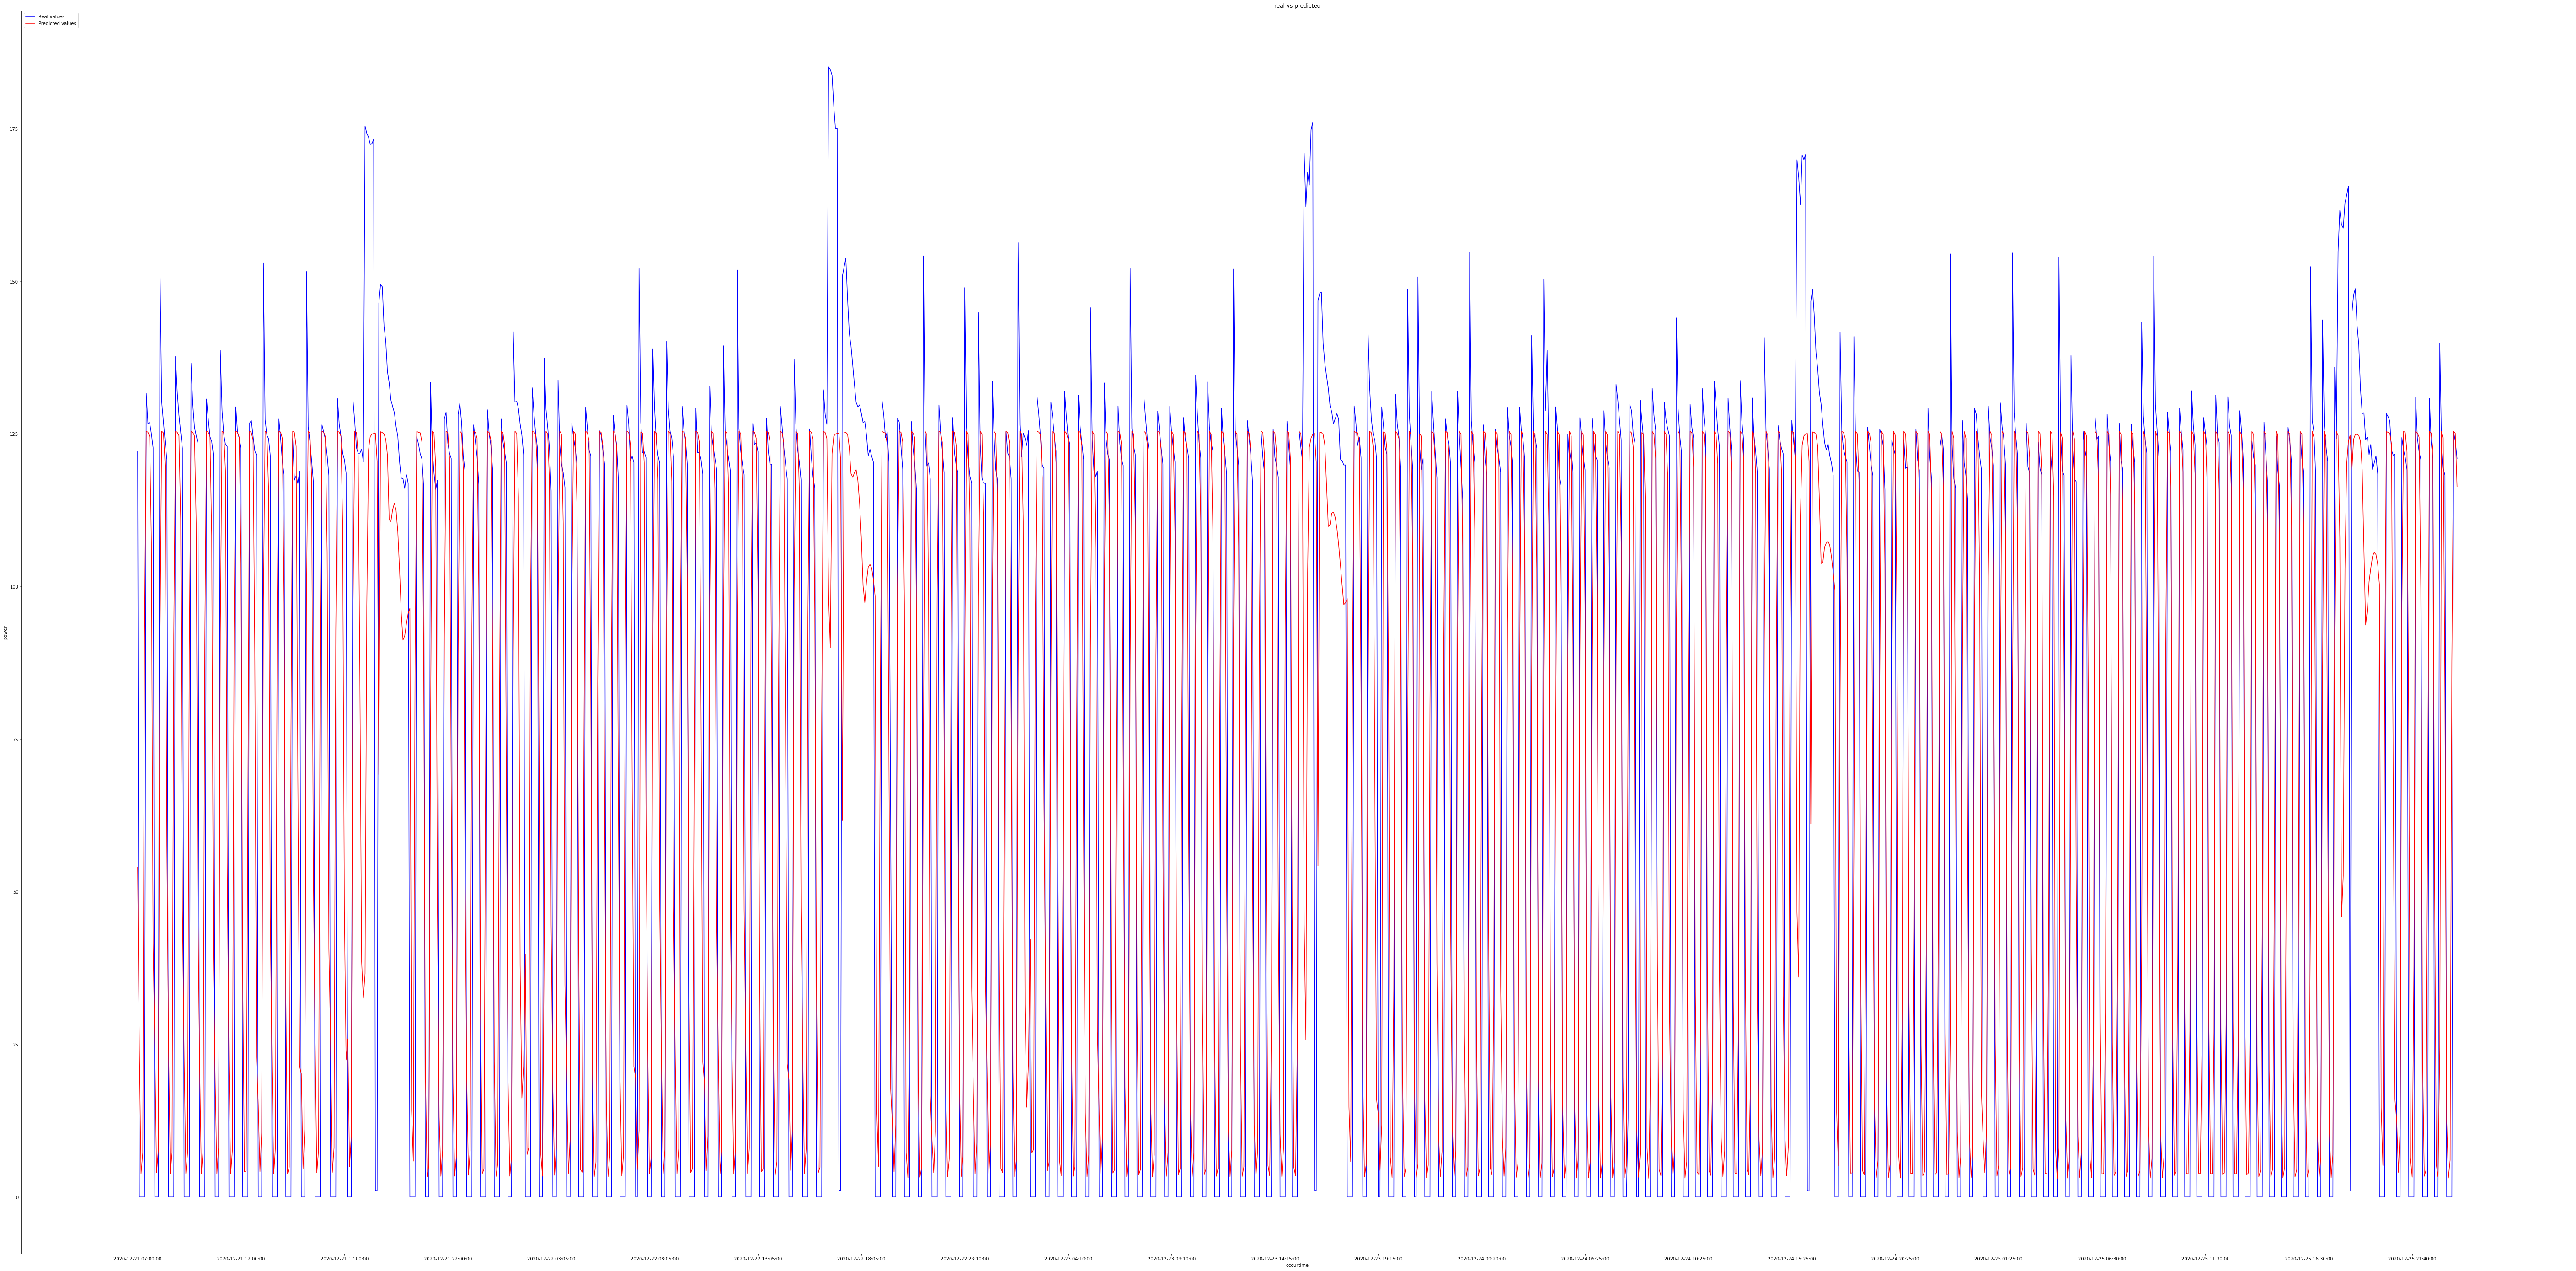

In [ ]:
plt.figure(figsize=(100, 50))
plt.xticks(np.arange(0, len(test), lag))
plt.plot(dates, test, color='blue', label='Real')
plt.plot(dates, predictions, color='red', label='predicted')
plt.title('real vs predicted')
plt.xlabel('occurtime')
plt.ylabel('power')
plt.legend(["Real values", "Predicted values"], loc="upper left")
plt.show()

In [ ]:
def get_mape(y_true, y_predicted):
    y_true, y_predicted = np.array(y_true), np.array(y_predicted)
    mape = np.mean(np.abs((y_true - y_predicted) / y_true)) * 100
    return mape
 
 
def get_rmse(y_true, y_predicted):
    rmse = np.sqrt(np.mean(np.power((y_true - y_predicted), 2)))
    return rmse
  
def get_sum_error(y_true, y_predicted):
  return sum(y_true)-sum(y_predicted)

In [ ]:
print(get_rmse(test, predictions)) # 0 -> 

36.97505179945514


In [ ]:
print(get_sum_error(test, predictions))

2686.152761631107
